In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("WineQT.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Classifier Models

In [12]:
X = df.drop(columns=['quality']) 
y = df['quality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.6812
Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 24 69  5  1]
 [ 0  0 11 15  0]
 [ 0  0  2  0  0]]
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"\nSupport Vector Classifier (SVC) Accuracy: {accuracy_svc:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))



Support Vector Classifier (SVC) Accuracy: 0.4934
Confusion Matrix:
[[ 0  2  4  0  0]
 [ 0 61 35  0  0]
 [ 0 47 52  0  0]
 [ 0 14 12  0  0]
 [ 0  1  1  0  0]]
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.49      0.64      0.55        96
           6       0.50      0.53      0.51        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.49       229
   macro avg       0.20      0.23      0.21       229
weighted avg       0.42      0.49      0.45       229



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD Classifier
sgd_model = SGDClassifier(random_state=42)

# Train the model
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_sgd = sgd_model.predict(X_test)

# Evaluate the model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"\nSGD Classifier Accuracy: {accuracy_sgd:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sgd))
print("Classification Report:")
print(classification_report(y_test, y_pred_sgd))



SGD Classifier Accuracy: 0.5328
Confusion Matrix:
[[ 0  1  5  0  0]
 [ 0 32 64  0  0]
 [ 0  9 90  0  0]
 [ 0  1 25  0  0]
 [ 0  0  2  0  0]]
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.74      0.33      0.46        96
           6       0.48      0.91      0.63        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.25      0.25      0.22       229
weighted avg       0.52      0.53      0.47       229



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Chemical Qualities

In [26]:
df_selected = df[['density', 'fixed acidity', 'quality']]

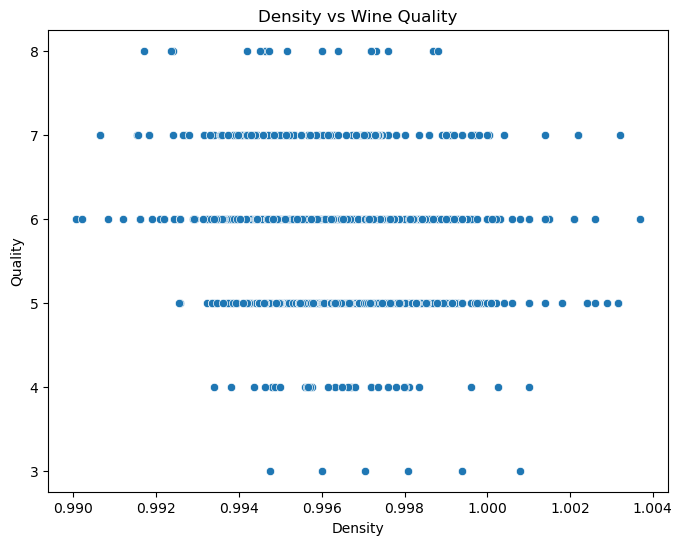

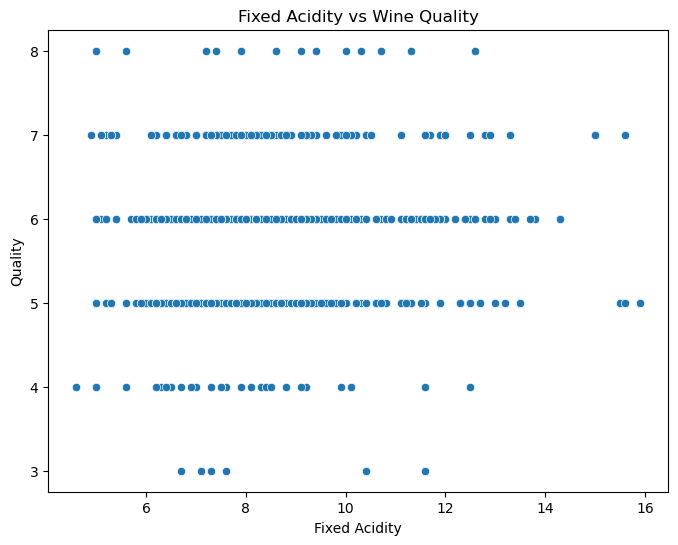

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for density vs quality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_selected, x='density', y='quality')
plt.title('Density vs Wine Quality')
plt.xlabel('Density')
plt.ylabel('Quality')
plt.show()

# Scatter plot for fixed acidity vs quality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_selected, x='fixed acidity', y='quality')
plt.title('Fixed Acidity vs Wine Quality')
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.show()


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.6812
Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 24 69  5  1]
 [ 0  0 11 15  0]
 [ 0  0  2  0  0]]
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Data Analysis Libraries

In [33]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [37]:
import numpy as np
# Create an array from a Python list
arr = np.array([1, 2, 3, 4, 5])
print(arr)

# Create a 2D array (matrix)
matrix = np.array([[1, 2], [3, 4], [5, 6]])
print(matrix)

# Create an array of zeros, ones, or a range of numbers
zeros = np.zeros((3, 3))  # 3x3 matrix of zeros
ones = np.ones((2, 2))    # 2x2 matrix of ones
range_arr = np.arange(0, 10, 2)  # Array of numbers from 0 to 10 with step 2
print(zeros, ones, range_arr)


[1 2 3 4 5]
[[1 2]
 [3 4]
 [5 6]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] [[1. 1.]
 [1. 1.]] [0 2 4 6 8]


### Data Visualization

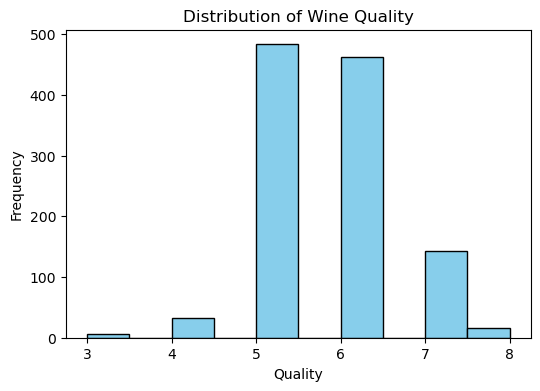

In [43]:
# Plotting a histogram of the 'quality' column
plt.figure(figsize=(6, 4))
plt.hist(df['quality'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()


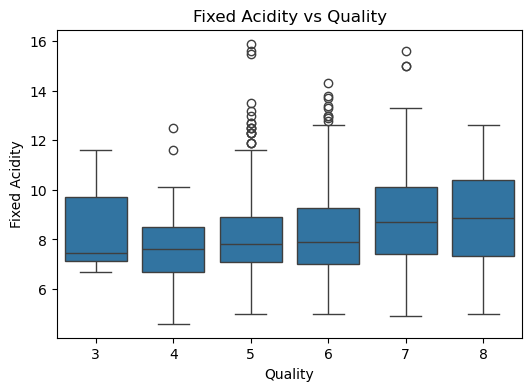

In [47]:
# Boxplot of 'quality' grouped by 'fixed acidity'
plt.figure(figsize=(6, 4))
sns.boxplot(x='quality', y='fixed acidity', data=df)
plt.title('Fixed Acidity vs Quality')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()


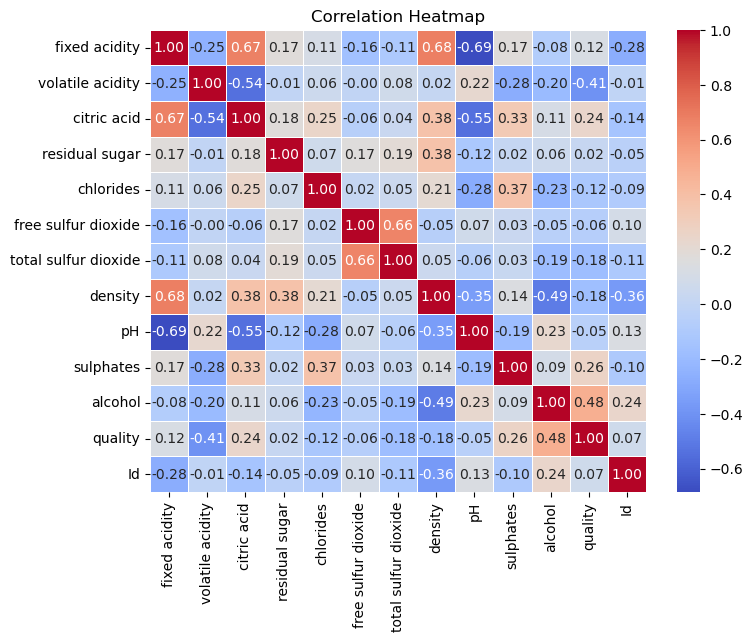

In [55]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_63608\47131968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='Set2')


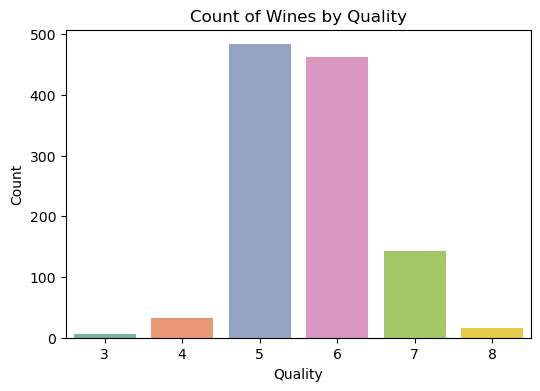

In [59]:
# Countplot of wine quality ratings
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df, palette='Set2')
plt.title('Count of Wines by Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


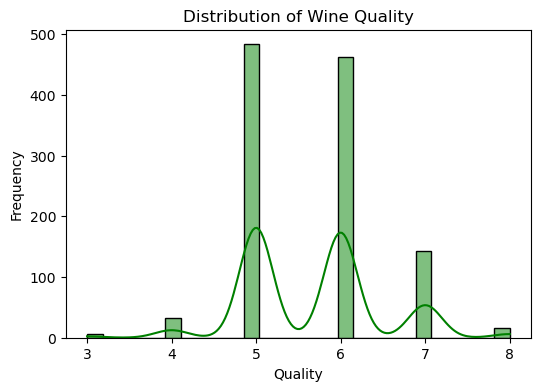

In [63]:
# Save a plot as an image
plt.figure(figsize=(6, 4))
sns.histplot(df['quality'], kde=True, color='green')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.savefig('wine_quality_distribution.png', dpi=300)  # Save as PNG with high resolution
plt.show()
